### **Human Pose Estimation - Step 1**

In [7]:
#### Project: Pose Estimation - Step 1. Getting the data
#### Author: Manu
#### Date: 2020-06-17
#### Goal: Data retrieval and basic exploration

# Import libraries required
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.io import loadmat
from matplotlib.pyplot import imshow, show, subplots 
%matplotlib inline

In [ ]:
# Download SVHN data
# Notes: It's a mat file, as a dictionary 
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

--2020-06-18 18:19:21--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  6.46MB/s    in 25s     

2020-06-18 18:19:46 (6.86 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2020-06-18 18:19:47--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  5.42MB/s    in 9.2s    

2020-06-18 18:19:57 (6.66 MB/s) - ‘test_32x32.mat’ saved [64275384/64

Dimensions of train dataset (32, 32, 3, 73257)
Dimension of train output (73257, 1)
Dimensions of test dataset (32, 32, 3, 26032)
Dimension of test output (26032, 1)
Digit:  [9]


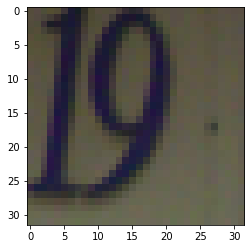

In [ ]:
# Print dimensions and show one image
print("Dimensions of train dataset", train['X'].shape)
print("Dimension of train output", train['y'].shape)
print("Dimensions of test dataset", test['X'].shape)
print("Dimension of test output", test['y'].shape)
plt.imshow(train['X'][:,:,:,1])
print("Digit: ", train['y'][1])
plt.show()

In [ ]:
# Convert label 10 into 0, as requested
train['y'][train['y']==10] = 0
test['y'][test['y']==10] = 0

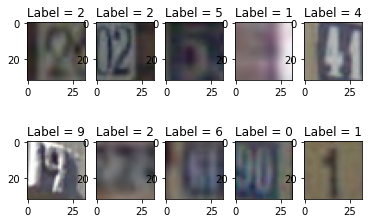

In [ ]:
# Print some additional images
samples = 10
shapes = 73000
indexes = np.random.choice(shapes, samples, replace = False)
fig, axes = subplots(2,5)
result = zip(indexes, axes.flat)
for i, ax in zip(indexes, axes.flat):
  subim = train['X'][:,:,:,i]
  label = train['y'][i]
  ax.imshow(np.asarray(subim))
  ax.set_title("Label = {}".format(label[0]))


In [ ]:
# Let's download COCO dataset from Amazon
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip
Done transferring all datasets


In [3]:
# Read json file from Files
import json
kpoints_filename = "annotations/person_keypoints_val2017.json"
json_file = open(kpoints_filename)
kpoints_json = json.load(json_file)

In [4]:
# Read annotations and key points
kpoints_data = kpoints_json['annotations'][0]
print(kpoints_json['categories'][0]['keypoints'][1:8])
print(kpoints_json['categories'][0]['keypoints'][9:])


['left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow']
['left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']


In [5]:
# Detect image name
image_id = kpoints_data['image_id']
print(image_id)

425226


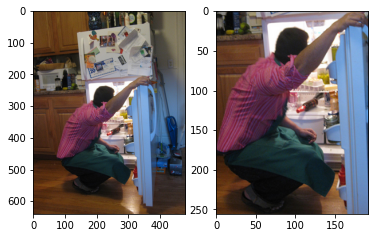

In [8]:
# Show image, crop and show keypoints
from matplotlib.patches import Rectangle
from PIL import Image
req_height = 256
req_width = 192
x_start, y_start, box_w, box_h = kpoints_data['bbox']
image_name = "./val2017/000000425226.jpg"
orig_image = Image.open(image_name)
orig_height, orig_width = orig_image.size
resized_image = orig_image.resize((req_width, req_height), box = (x_start, y_start, x_start + box_w, y_start + box_h))
fig, axes = subplots(1,2)
axes[0].imshow(np.asarray(orig_image))
axes[1].imshow(np.asarray(resized_image))

(0.6387650542284916, 0.687248322147651)
[0]nose: (0,0,0)
[1]left_eye: (0,0,0)
[2]right_eye: (0,0,0)
[3]left_ear: (0,0,0)
[4]right_ear: (0,0,0)
[5]left_shoulder: (142,309,1)
[6]right_shoulder: (177,320,2)
[7]left_elbow: (191,398,2)
[8]right_elbow: (237,317,2)
[9]left_wrist: (233,426,2)
[10]right_wrist: (306,233,2)
[11]left_hip: (92,452,2)
[12]right_hip: (123,468,2)
[13]left_knee: (0,0,0)
[14]right_knee: (251,469,2)
[15]left_ankle: (0,0,0)
[16]right_ankle: (162,551,2)


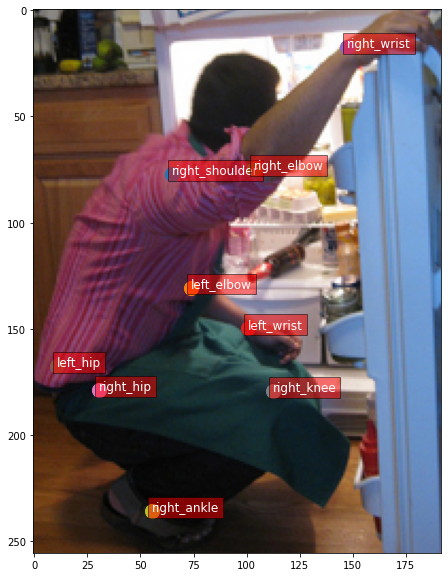

In [40]:
# Since we rescaled the images, the keypoints should be updated
x_ratio = resized_image.size[0] / box_w
y_ratio = resized_image.size[1] / box_h
print(f'({x_ratio}, {y_ratio})')
skeleton_points = kpoints_data['keypoints']
fig = plt.figure(figsize = (10,10))
plt.imshow(resized_image)
for index, label in enumerate(kpoints_json['categories'][0]['keypoints'], start = 0):
  x = skeleton_points[index*3]
  y = skeleton_points[index*3+1]
  v = skeleton_points[index*3+2]
  print(f'[{index}]{label}: ({x},{y},{v})')
  if v == 2:
    x_res = (x - x_start - 2) * x_ratio 
    y_res = (y - y_start - 2) * y_ratio
    plt.scatter(x_res, y_res, 200)
    plt.text(x_res, y_res, label, fontsize = 12, bbox=dict(facecolor='red', alpha=0.5),color='w')
